In [1]:
from __future__ import unicode_literals
from hazm import *
import numpy as np
# import tensorflow as tf
import pandas as pd
from collections import Counter
import csv, re, pickle

# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Flatten
# import numpy as np
# from keras.utils import to_categorical
# import re
# from utils import words_list, stopwords_list
# from stopping_utility import *
# import nltk
# import wapiti

from colorama import Back, Fore, Style
import time
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import manifold
import pyclustering as pyclus
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# data = pd.read_excel("LifeTime Of question.xlsx")
# reviews = data['text']
# # rate = data['Score']
# # labels = list(data['subject'])
# len(reviews)

In [3]:
### stopwords_list(reviews,"dataset1.txt")

In [4]:
# labels

## cleaning data from none texts, digits, and ...

In [5]:
'''Maybe deleting digits from data was not good idea:(((('''

# RE_USELESS = r'[^\w]'  # remove useless characters
# # RE_DIGIT = r"^\d+\s|\s\d+\s|\s\d+$"  # remove digits
# RE_SPACE = r'\s+'  # remove space
# RE_EMAILS = r'[\w\.-]+@[\w\.-]+'
# RE_URLS = r'http\S+'
# RE_WWW = r'www\S+'


# def clean_all_save(document, save_file_path):
#     """
#     this function generate raw persian text, it remove non-persian character
#     and all numbers and symbols
#     :param document:
#     :param save_file_path:
#     :return:
#     """
#     with open(save_file_path, 'w') as output:
#         for sentence in document:
#             sentence = clean_sentence(sentence)
#             output.write(sentence + '\n')
#     return None


# def clean_all(document, doc_pattern=r'<TEXT>(.*?)</TEXT>'):
#     """
#     clean text like hamshahri, irBlogs, and other Treck format
#     :param document:
#     :param doc_pattern:
#     :return:
#     """
#     clean = ''
#     document = re.findall(doc_pattern, document, re.DOTALL)
#     for sentence in document:
#         sentence = clean_sentence(sentence)
#         clean += ' \n' + sentence
#     return clean


# def clean_sentence(sentence):
#     sentence = re.sub(r'[^\u0621-\u06ff]', ' ', sentence)
#     sentence = arToPersianChar(sentence)
#     sentence = arToPersianNumb(sentence)
#     sentence = faToEnglishNumb(sentence)
#     sentence = re.sub(r'[a-zA-Z]', ' ', sentence)
#     sentence = re.sub(r'[0-9]', ' ', sentence)
#     sentence = re.sub(RE_WWW, r' ', sentence)
#     sentence = re.sub(RE_URLS, r' ', sentence)
#     sentence = re.sub(RE_EMAILS, r' ', sentence)
#     sentence = re.sub(RE_USELESS, r' ', sentence)
#     sentence = re.sub(RE_DIGIT, r' ', sentence)
#     sentence = re.sub(RE_SPACE, r' ', sentence)
#     return sentence


# def arToPersianNumb(number):
#     dic = {
#         '١': '۱',
#         '٢': '۲',
#         '٣': '۳',
#         '٤': '۴',
#         '٥': '۵',
#         '٦': '۶',
#         '٧': '۷',
#         '٨': '۸',
#         '٩': '۹',
#         '٠': '۰',
#     }
#     return multiple_replace(dic, number)


# def arToPersianChar(userInput):
#     dic = {
#         'ك': 'ک',
#         'دِ': 'د',
#         'بِ': 'ب',
#         'زِ': 'ز',
#         'ذِ': 'ذ',
#         'شِ': 'ش',
#         'سِ': 'س',
#         'ى': 'ی',
#         'ي': 'ی'
#     }
#     return multiple_replace(dic, userInput)


# def faToEnglishNumb(number):
#     dic = {
#         '۰': '0',
#         '۱': '1',
#         '۲': '2',
#         '۳': '3',
#         '۴': '4',
#         '۵': '5',
#         '۶': '6',
#         '۷': '7',
#         '۸': '8',
#         '۹': '9',
#     }
#     return multiple_replace(dic, number)


# def multiple_replace(dic, text):
#     pattern = "|".join(map(re.escape, dic.keys()))
#     return re.sub(pattern, lambda m: dic[m.group()], str(text))

'Maybe deleting digits from data was not good idea:(((('

In [6]:
# def clean_all(document):
#     clean = ''
#     for sentence in document:
#         sentence = clean_sentence(sentence)
#         clean += sentence
#     return clean

In [7]:
# j = k = i = 0
# reviews1 = []
# # labels1 = []
# # labels1 = list(labels.copy())
# normalizer = Normalizer()
# for review in reviews:
#     sentences = normalizer.normalize(clean_all(review))
#     reviews1.append(sentences)
# #     for j in range(len(sentences)):
# #         labels1.insert(i + k, labels[i])
# #         k += 1
#     i += 1

In [8]:
# print(len(reviews1))

In [9]:
# reviews1[0]

In [10]:
# data['text'] = reviews1
# data.to_excel("QuestionForTextMining_No_NewLine.xlsx", index=False)

In [11]:
textdata = pd.read_excel("Question_kewords and key score.xlsx")
keyword = textdata['Q_keyword']
# rate = data['Score']
# labels = list(data['subject'])
data = textdata.copy()
print(len(keyword))
data.head()


8033


,id,user_id,text,personal content,Share non personal content,advertising,guide request,invite to talk,ambiguous,about lak lak,...,hate,worry,lak lak team,friend in lak lak,a person in lak lak,all audience,group of women,word_count,Q_keyword,Keyword_count
0,757699,4965,💥💥💥💥بچه‌ها 💥💥💥💥 بیایین، سوال مثبت ۱۸ 🔥🔥 دارم 🙊...,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,9,بیایین مثبت سوال بچهها,4
1,757688,43258,واقعا ک بعضیا چقد بی درکن و ادعا دارن فقط. بند...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,63,خدای نکرده بنده خدا خدای کارو نگا دکتری حالتون...,28
2,757646,68217,واقعا که چرا اینکارا رو میکنین یکیتون بچه سقط ...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,52,سقط جنین عکس یکم رعایت باردارن میزارین رعایت ب...,20
3,756589,68139,خانما چالش نزاشتین امروز😀چه عجب یه چالش بگین ح...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,چالش عجب حوصلم چطوره گل بگین خانما,7
4,756586,2724,سلام چطورید خوبید؟ 😁😄😘😘😘😘رنگ موروشن خوشگل میخو...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,13,خوشگل آخرین چطوره خوبید شماره رنگ میخوام,7


## Deleting stop words

In [12]:
# stopwords = pd.read_csv('STOPWORDS',header=None)
# len(stopwords)

In [13]:
# import heapq
# # using heapify to convert list into heap 
# heap = heapq.heapify(list(stopwords.loc[:,0])) 
  
# # # printing created heap 
# # print ("The created heap is : ",end="") 
# # print (heap.) 
# type(heap)

In [14]:
# # Python program for insert and search 
# # operation in a Trie 

# class TrieNode: 

#     # Trie node class 
#     def __init__(self): 
#         self.children = [None]*15000

#         # isEndOfWord is True if node represent the end of the word 
#         self.isEndOfWord = False

# class Trie: 

#     # Trie data structure class 
#     def __init__(self): 
#         self.root = self.getNode() 

#     def getNode(self): 

#         # Returns new trie node (initialized to NULLs) 
#         return TrieNode() 

#     def _charToIndex(self,ch): 

#         # private helper function 
#         # Converts key current character into index 
#         # use only 'a' through 'z' and lower case 

#         return ord(ch)-ord('!') 


#     def insert(self,key): 

#         # If not present, inserts key into trie 
#         # If the key is prefix of trie node, 
#         # just marks leaf node 
#         pCrawl = self.root 
#         length = len(key) 
#         for level in range(length): 
#             index = self._charToIndex(key[level]) 

#             # if current character is not present 
#             if not pCrawl.children[index]: 
#                 pCrawl.children[index] = self.getNode() 
#             pCrawl = pCrawl.children[index] 

#         # mark last node as leaf 
#         pCrawl.isEndOfWord = True

#     def search(self, key): 

#         # Search key in the trie 
#         # Returns true if key presents 
#         # in trie, else false 
#         pCrawl = self.root 
#         length = len(key) 
#         for level in range(length): 
#             index = self._charToIndex(key[level]) 
#             if not pCrawl.children[index]: 
#                 return False
#             pCrawl = pCrawl.children[index] 

#         return pCrawl != None and pCrawl.isEndOfWord 

# # # driver function 
# # def main(): 

# #     # Input keys (use only 'a' through 'z' and lower case) 
# #     keys = list(stopwords.loc[:,0])

# #     output = ["Not present in trie", 
# #             "Present in trie"] 

# #     # Trie object 
# #     t = Trie() 

# #     # Construct trie 
# #     for key in keys: 
# #         t.insert(key) 

# #     # Search for different keys 
# # #     print("{} ---- {}".format("the",output[t.search("the")])) 
# # #     print("{} ---- {}".format("these",output[t.search("these")])) 
# # #     print("{} ---- {}".format("their",output[t.search("their")])) 
# #     print("{} ---- {}".format("ازنذ",output[t.search("ازنذ")])) 

# # if __name__ == '__main__': 
# #     main() 

# # This code is contributed by Atul Kumar (www.facebook.com/atul.kr.007) 


In [15]:
# ord('!')-ord('!') 

In [16]:
# # Input keys (use only 'a' through 'z' and lower case) 
# keys = list(stopwords.loc[:,0])

# output = ["Not present in trie", 
#         "Present in trie"] 

# # Trie object 
# t = Trie() 

# # Construct trie 
# for key in keys: 
#     t.insert(key) 


# print("{} ---- {}".format("از",output[t.search("از")])) 



In [17]:
#### Testing
# rev = reviews1[0]

# print(rev)
# #rev = rev.replace('\u200c',' ')
# rev = rev.replace('\u200f',' ')
# rev = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', rev)
# rev.split(' ')
# words = rev.split()

# words1 = words.copy()
# for w in words:
#     if w == '':
#         words1.remove(w)
#         continue
#     if t.search(w):
#         words1.remove(w)

# words = words1
# text = ''
# for w in words:
#     text += w + ' '
# text


In [18]:
# i = 0
# reviews = reviews1.copy()
# for rev in reviews1:
# #     rev = rev.replace('\u200c',' ')
#     try:
#         rev = rev.replace('\u200f',' ')
#         rev = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', rev)
#     except:
#         print(rev)
#     rev.split(' ')
#     words = rev.split(' ')

#     words1 = words.copy()
#     for w in words:
#         if w == '':
#             words1.remove(w)
#             continue
#         if t.search(w):
#             words1.remove(w)

#     words = words1
#     text = ''
#     for w in words:
#         text += w + ' '
#     reviews[i] = text
#     i += 1
# # reviews1 = reviews.copy()
# # del reviews

### Stop word deleting finished

In [19]:
## If you wish to withdraw stopword deletion, uncomment the below line, and run it.
# reviews = reviews1

In [20]:
keyword[1]

'خدای نکرده بنده خدا خدای کارو نگا دکتری حالتون اشتباهی بنده اتفاق بعضیا گوش بزنید مجبور نگران نمیکنم نکرده بخوره چقد دارن نداره خدا بهم اگه دیگه چیه'

In [21]:
#cleaning dataset
#word_tokenize
words=[]
all_text = ''
i = 0
# stemmer = Stemmer()
for text in keyword:
    try:
        text = text.replace('\u200c',' ')
        text = text.replace('\u200f',' ')
        text = text.replace('\u200f',' ')
        text = text.replace('\u200f',' ')

#         text = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', text)
        all_text += text
        all_text += ' '
        wordsInText = text.split()
        for word in wordsInText:
    #         word = stemmer.stem(word)
            if word != ' ' or word != '':
                words.append(word)
    except:
        text = textdata['text'][i]
        text = text.replace('\u200f',' ')
        text = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', text)
        all_text += text
        all_text += ' '
        wordsInText = text.split()
        for word in wordsInText:
    #         word = stemmer.stem(word)
            if word != ' ' or word != '':
                words.append(word)
    
    i += 1
print(i)
# len(words)

8033


In [22]:
# Bulding the dictionary
counts = Counter(words)

vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

with open("mySavedDict.txt", "wb") as myFile:
    pickle.dump(vocab_to_int, myFile)

'''
with open("mySavedDict.txt", "rb") as myFile:
    myNewPulledInDictionary = pickle.load(myFile)
'''


'\nwith open("mySavedDict.txt", "rb") as myFile:\n    myNewPulledInDictionary = pickle.load(myFile)\n'

In [23]:
# vocab_to_int

In [24]:
reviews_ints = []
for each in keyword:
    #print (each)
#     each = each.replace('\u200c',' ')
    each = each.replace('\u200f',' ')
    each = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', each)
    reviews_ints.append([vocab_to_int[word] for word in each.split()])


review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))


Zero-length reviews: 0
Maximum review length: 241


In [25]:
# reviews_ints[1]

In [26]:
mi = 15000
su = ma = 0
i = 0
low = []
for each in reviews_ints:
    if len(each) <= 0:
        low.append(i)
    if len(each) <= mi:
#         print(each,i,len(each))
        mi = len(each)
    if len(each) > ma:
        ma = len(each)
    su += len(each)
    i += 1
print('min lenght: '+str(mi),' and max lenght: '+str(ma),' and mean lenght: '+str(su/len(reviews_ints)))



min lenght: 1  and max lenght: 241  and mean lenght: 31.1125357898668


In [27]:
len(low)

0

In [28]:
reviews_ints22 = reviews_ints.copy()
for i in range(len(low)):
    print(reviews_ints22.pop(low[len(low)- i -1]),low[len(low)- i -1])
len(reviews_ints22)


8033

In [29]:
reviews_ints = reviews_ints22.copy()
len(reviews_ints)

8033

In [30]:
# textdata.drop(low, inplace=True)
# textdata.to_excel('QuestionForTextMining_No_NewLine.xlsx', index=False)

In [31]:
dictlist = []
for key, value in enumerate(vocab_to_int.items()):
    temp = [key,value]
#     print(key, value)
    dictlist.append(temp)

In [32]:
len(dictlist)

3153

In [76]:
n_words = len(vocab)
print (n_words)

seq_len = n_words
features1 = np.zeros((len(reviews_ints), seq_len), dtype=int)

for i, row in enumerate(reviews_ints):
    for j in range(len(row)):
        features1[i, np.array(row)[j]-1] = 1

#     features[i, :] = np.array(row)[:seq_len]
# frames = [pd.DataFrame(features1), data.iloc[:,3:-3]]

# features = pd.concat(frames, axis=1, sort=False).values
# features.shape
features = features1
features.shape

3153


(8033, 3153)

In [34]:
3153+39

3192

In [35]:
# minmax normalization
def minmax(data):
    normData = data
    data = data.astype(float)
    normData = normData.astype(float)
    for i in range(0, data.shape[1]):
        tmp = data.iloc[:, i]
        # max of each column
        maxElement = np.amax(tmp)
        # min of each column
        minElement = np.amin(tmp)

        # norm_dat.shape[0] : size of row
        for j in range(0, normData.shape[0]):
            normData[i][j] = float(
                data[i][j] - minElement) / (maxElement - minElement)

    normData.to_csv('result/norm_data.csv', index=None, header=None)
    return normData
data = pd.DataFrame(features)
# data = minmax(data)  # normalize

In [36]:
X = data
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])
# col = list(textdata.columns[3:9])
col = (textdata.columns[31:-8])
len(col)

7

[0.01320261 0.02574107 0.03653864 ... 1.         1.         1.        ]


Text(0, 0.5, 'cumulative explained variance')

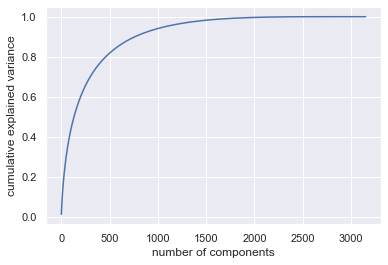

In [37]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
l = []
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [38]:
print(np.cumsum(pca.explained_variance_ratio_)[600])

0.8560787061671096


[0.012538463949667842, 0.010797572107980862, 0.009978723682278305, 0.009202306165232696, 0.00895369270898913, 0.008710852588175208, 0.008652983013097762, 0.0081672816018728, 0.007940906286878088, 0.007833547176322814, 0.00747329555672982, 0.007018350032793053, 0.006875394380303559, 0.0067710480273434626, 0.006406302763669214, 0.0062800187570211385, 0.006168528090584741, 0.0059210408120280444, 0.005812585806375836, 0.005671924643682241, 0.005558370547654928, 0.005339409842882059, 0.0052687258470534015, 0.005161232733408322, 0.005103527462400337, 0.005021334808955807, 0.004872240209268935, 0.004805102906792702, 0.00474947950079932, 0.004680986809144583, 0.004601054861505388, 0.004544450496489799, 0.0044609717949624095, 0.0043821721294774185, 0.004347652332632623, 0.0043220187603686955, 0.004204377301986917, 0.00417974769611168, 0.004159441545930342, 0.004094185384519555, 0.003992373500367019, 0.003940619777530685, 0.003890617884870773, 0.0038357032558911097, 0.0037908179160306976, 0.0037

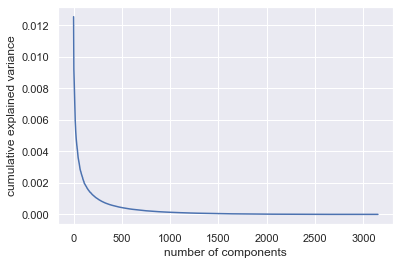

In [39]:
l = []
varRatio = np.cumsum(pca.explained_variance_ratio_)
for i in range(1,len(varRatio)):
    l.append(varRatio[i]-varRatio[i-1])
# # print(np.cumsum(pca.explained_variance_ratio_))
print(l)
plt.plot(l)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:

pca_model = PCA(n_components=600)
X_PCAdata = pca_model.fit_transform(X)
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)
X_PCAdata.shape

(8033, 600)

In [41]:
# pca = PCA(n_components=2).fit(X)

# print(pca.explained_variance_ratio_)

In [69]:
# 2D embedding of dataset
print("Computing embedding")
X_manifold = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")


Computing embedding
Done.


In [42]:
NumbOfcluster = 3

In [43]:

#### kmeans algorithm
from sklearn.cluster import KMeans
# start = time.time()
kmean = KMeans(n_clusters=NumbOfcluster, max_iter=500)
kmean.fit(X_PCAdata)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Label of  0  has  0.1256068716544255  ratio of whole data
Label of  1  has  0.0012448649321548612  ratio of whole data
Label of  2  has  0.8731482634134197  ratio of whole data


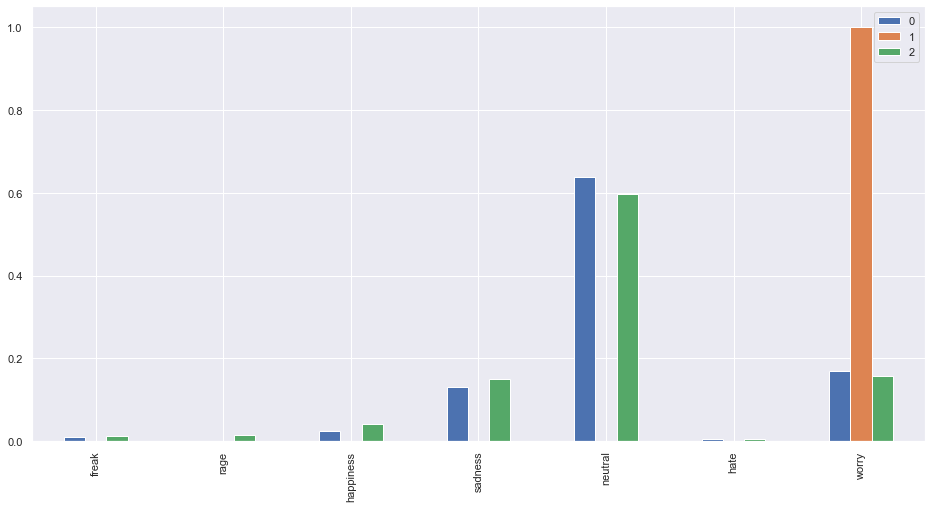

In [44]:
df = []
for i in range(NumbOfcluster):
    newdata = textdata[kmean.labels_==i]
    print('Label of ',i ,' has ', len(newdata.iloc[:,0])/len(textdata.iloc[:,0])," ratio of whole data")
    cluster = []
    for x in col:
        cluster.append(sum(newdata[x] == 1)/sum(kmean.labels_ == i))
#     cluster = [sum(newdata[x]==1)/sum(kmean.labels_ ==i) for x in col]
    df.append(cluster)

df = pd.DataFrame(df)
df.columns = col
df.T.plot.bar(figsize=(16, 8))

In [45]:
df

,freak,rage,happiness,sadness,neutral,hate,worry
0,0.010902,0.000991,0.025768,0.130823,0.639247,0.004955,0.170466
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.012689,0.014257,0.042629,0.151269,0.596664,0.004420,0.156544


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002218052F208>,
      dtype=object)

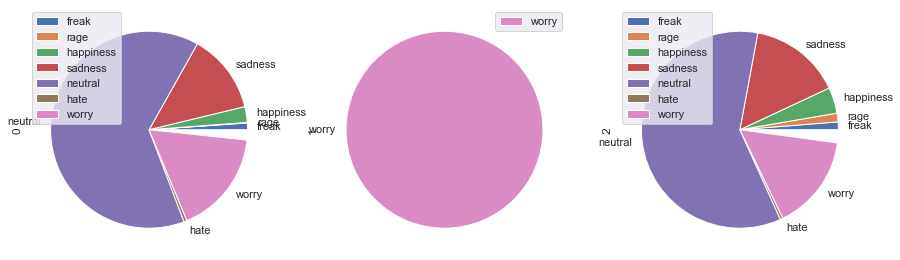

In [46]:
df.T.plot.pie(figsize=(15, 10),subplots=True)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
# !pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='***', api_key='***')


In [48]:

# fig, ax = plt.subplots(figsize = (12,6))
# plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['text.color'] = '#909090'
# plt.rcParams['axes.labelcolor']= '#909090'
# plt.rcParams['xtick.color'] = '#909090'
# plt.rcParams['ytick.color'] = '#909090'
# plt.rcParams['font.size']=28
# color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
#                       '#C1F0F6', '#0099CC']
# ind = np.arange(len(col))
# bars1 = ax.bar(ind, df.iloc[0], 
#         color = color_palette_list, 
#         label='Percentage of question')
# ax.set_title("Cluster0")
# ax.set_ylabel("Percentage of Question")
# ax.set_ylim((0,1))
# ax.set_xticks(range(0,len(ind)))
# ax.set_xticklabels(list(col), rotation=70)
# ax.set_xlabel("Question Types")

In [49]:
# lab = list(kmean.labels_ == 2)
# objective = list(textdata['پیش از بارداری و اقدام']==1)

In [50]:
# sum(objective and lab)

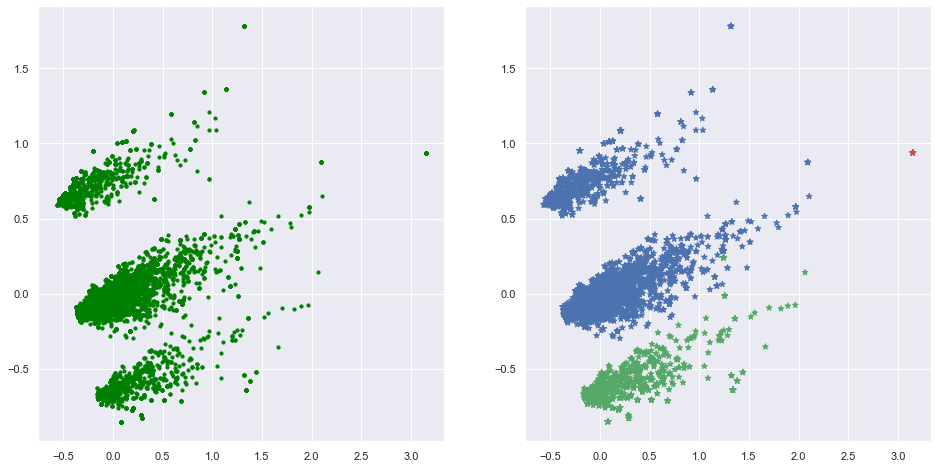

In [51]:
########## PCA of features for Kmeans
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')

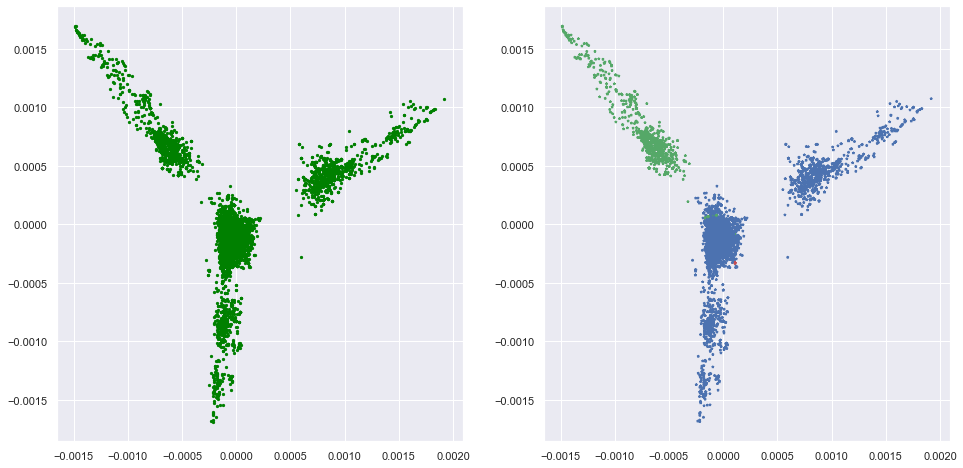

In [70]:
#----------------------------------------------------------------------
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=5)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[kmean.labels_], marker='*',s=5)

In [53]:
from sklearn.cluster import Birch

brc = Birch(branching_factor=10, n_clusters=NumbOfcluster, threshold=0.5, compute_labels=True)
brc.fit(X_PCAdata) 
# Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
#    threshold=0.5)
ClusterBirch = brc.predict(X_PCAdata)


Label of  0  has  0.09709946470807918  ratio of whole data
Label of  1  has  0.04493962405079049  ratio of whole data
Label of  2  has  0.8579609112411304  ratio of whole data


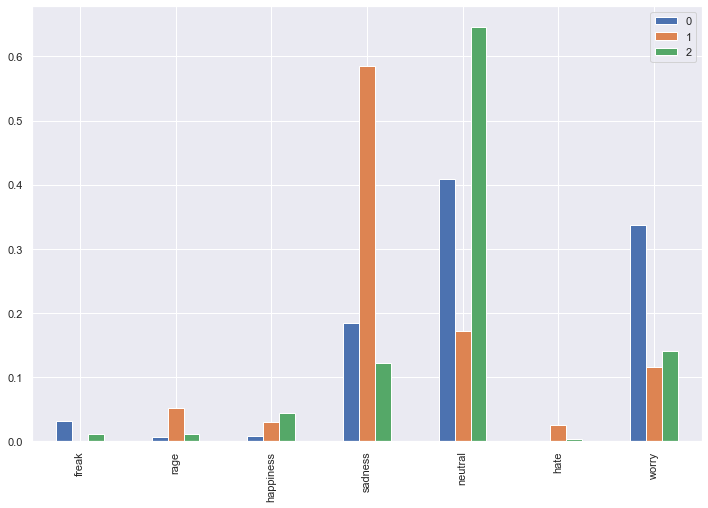

In [54]:
df1 = []
for i in range(NumbOfcluster):
    newdata = textdata[ClusterBirch==i]
    print('Label of ',i ,' has ', len(newdata.iloc[:,0])/len(textdata.iloc[:,0])," ratio of whole data")
    cluster = []
    for x in col:
        cluster.append(sum(newdata[x] == 1)/sum(ClusterBirch== i))
#         print(cluster)
#     cluster = [sum(newdata[x]==1)/sum(kmean.labels_ ==i) for x in col]
    df1.append(cluster)
    
df1 = pd.DataFrame(df1)
df1.columns = col
df1.T.plot.bar(figsize=(12, 8))

In [55]:
df1

,freak,rage,happiness,sadness,neutral,hate,worry
0,0.032051,0.006410,0.008974,0.184615,0.408974,0.000000,0.337179
1,0.000000,0.052632,0.030471,0.584488,0.171745,0.024931,0.116343
2,0.010882,0.011172,0.044544,0.121590,0.645531,0.003918,0.141468


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022182FEAD30>,
      dtype=object)

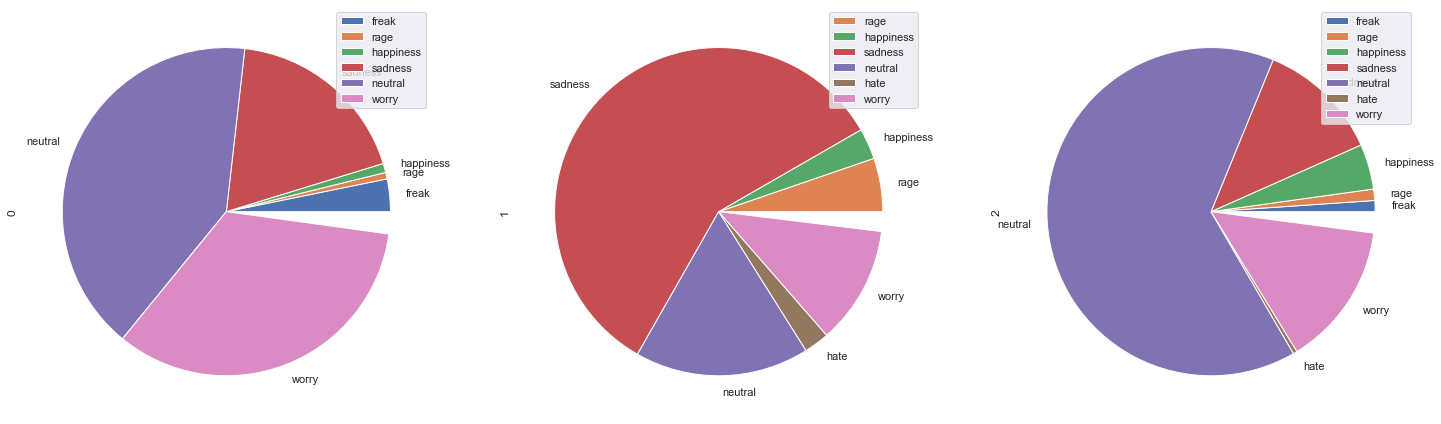

In [56]:
df1.T.plot.pie(figsize=(25, 15),subplots=True)

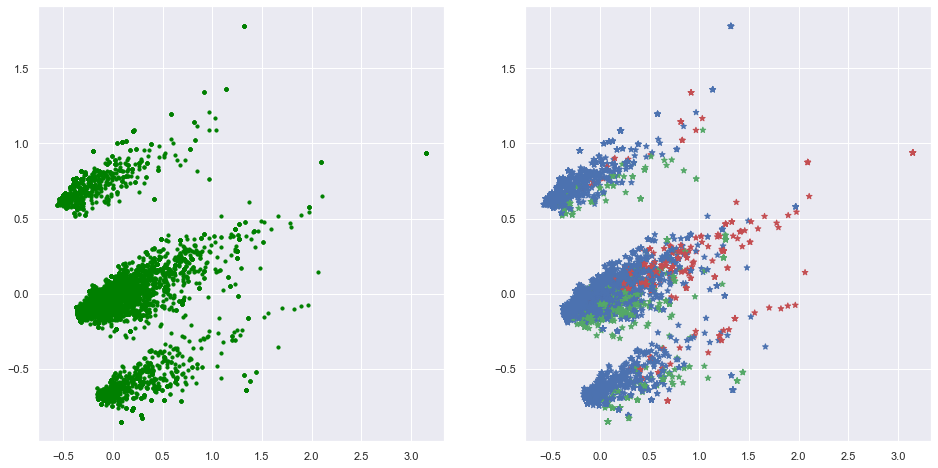

In [57]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[ClusterBirch], marker='*')

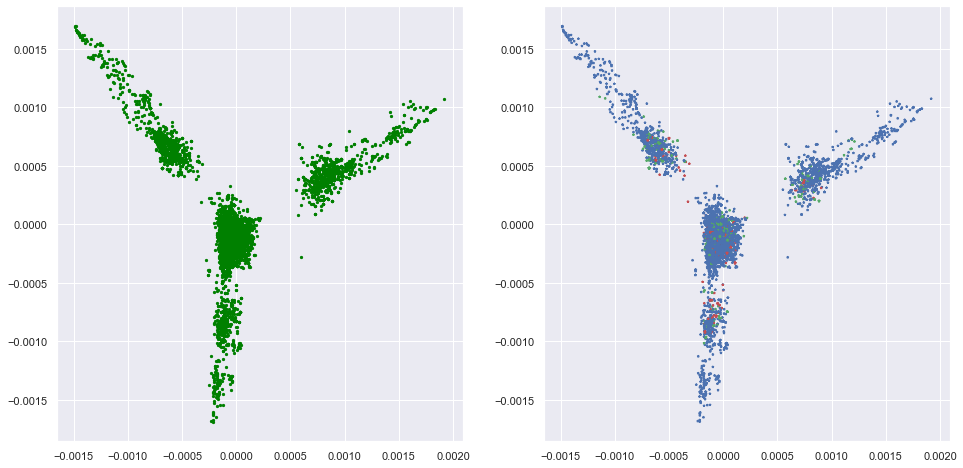

In [71]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=5)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[ClusterBirch], marker='*',s=4)

In [59]:

from sklearn import manifold, datasets


n_samples, n_features = X_PCAdata.shape

np.random.seed(0)

# def nudge_images(X, y):
#     # Having a larger dataset shows more clearly the behavior of the
#     # methods, but we multiply the size of the dataset only by 2, as the
#     # cost of the hierarchical clustering methods are strongly
#     # super-linear in n_samples
#     shift = lambda x: ndimage.shift(x.reshape((8, 8)),
#                                   .3 * np.random.normal(size=2),
#                                   mode='constant',
#                                   ).ravel()
#     X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
#     Y = np.concatenate([y, y], axis=0)
#     return X, Y


# X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str('*'),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
# #----------------------------------------------------------------------
# # 2D embedding of the digits dataset
# print("Computing embedding")
# X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
# print("Done.")

In [60]:
#### finding bestlinkage for agglomerative
# from time import time

# import numpy as np
# from scipy import ndimage

# for linkage in ('ward', 'average', 'complete', 'single'):
#     clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
#     t0 = time()
#     clustering.fit(X_PCAdata)
#     print("%s :\t%.2fs" % (linkage, time() - t0))

#     plot_clustering(X_PCA, clustering.labels_, "%s linkage" % linkage)
    

In [61]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import numpy as np

Aggclustering = AgglomerativeClustering(n_clusters = NumbOfcluster).fit(X_PCAdata[:,0:10])
# Aggclustering.labels_


Label of  0  has  0.7730611228681687  ratio of whole data
Label of  1  has  0.12261919581725383  ratio of whole data
Label of  2  has  0.10431968131457736  ratio of whole data


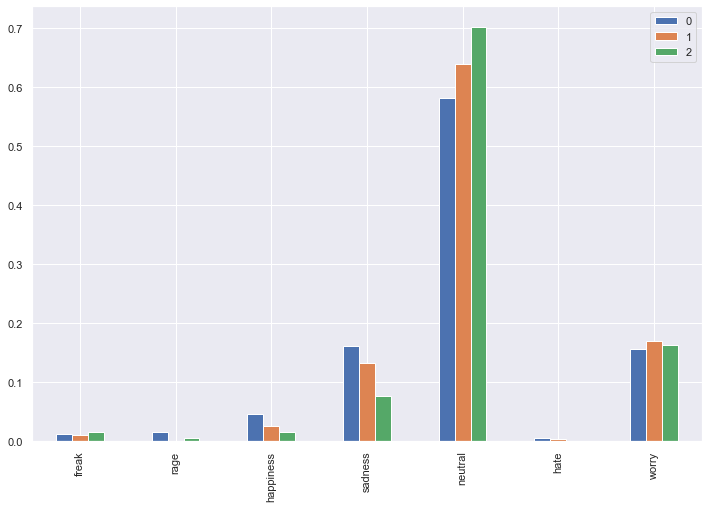

In [62]:
df2 = []
for i in range(NumbOfcluster):
    newdata = textdata[Aggclustering.labels_==i]
    print('Label of ',i ,' has ', len(newdata.iloc[:,0])/len(textdata.iloc[:,0])," ratio of whole data")
    cluster = []
    for x in col:
        cluster.append(sum(newdata[x] == 1)/sum(Aggclustering.labels_== i))
#         print(cluster) 
#     cluster = [sum(newdata[x]==1)/sum(kmean.labels_ ==i) for x in col]
    df2.append(cluster)
    
df2 = pd.DataFrame(df2)
df2.columns = col
df2.T.plot.bar(figsize=(12, 8))

In [63]:
df2

,freak,rage,happiness,sadness,neutral,hate,worry
0,0.012238,0.015459,0.046216,0.160870,0.581643,0.005153,0.157166
1,0.011168,0.001015,0.025381,0.131980,0.639594,0.004061,0.169543
2,0.015513,0.004773,0.015513,0.076372,0.701671,0.000000,0.163484


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002218024B6D8>,
      dtype=object)

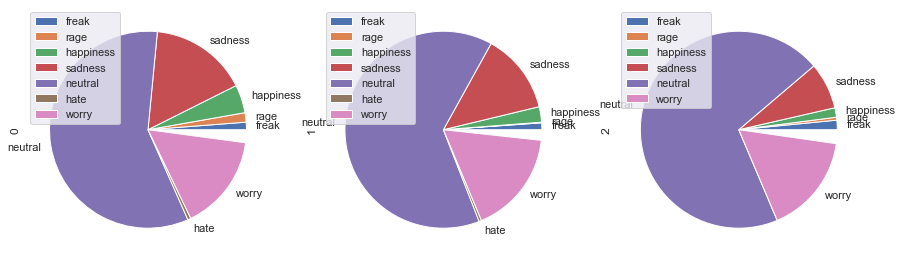

In [64]:
df2.T.plot.pie(figsize=(15, 10),subplots=True)

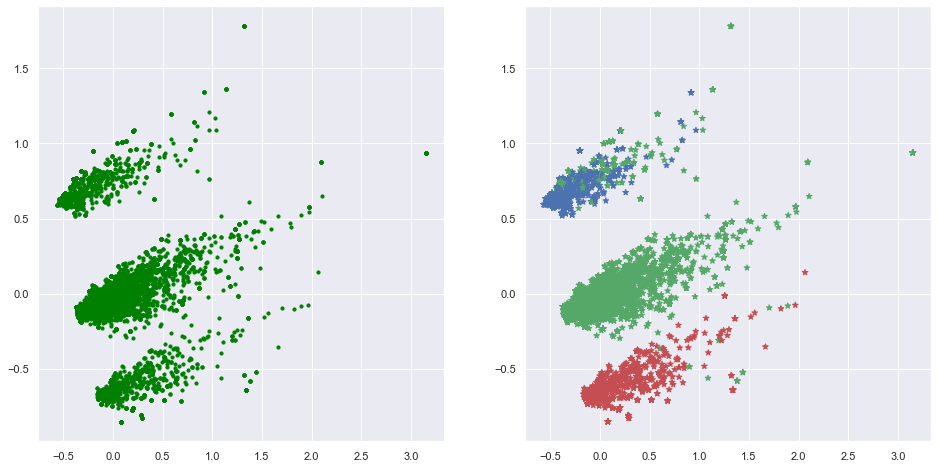

In [65]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[Aggclustering.labels_], marker='*')

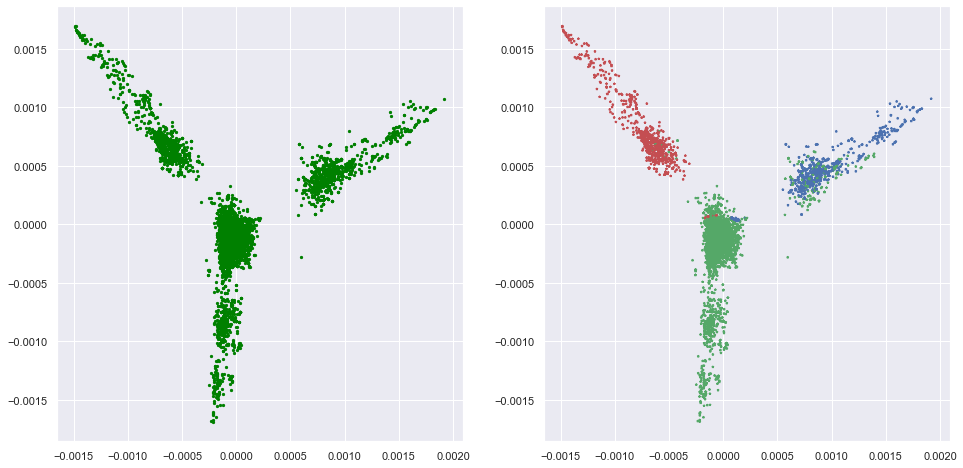

In [72]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=5)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[Aggclustering.labels_], marker='*',s=4)

In [73]:
labels = kmean.labels_
KMeans_Sil = metrics.silhouette_score(X_PCA, kmean.labels_, metric='euclidean')
print('Kmeans silhouette ',KMeans_Sil)

Kmeans silhouette  0.4418592910027835


In [74]:

print("Birch Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_PCA, ClusterBirch, metric='sqeuclidean'))


Birch Silhouette Coefficient: 0.163


In [75]:
print("Agglomerative Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_PCA, Aggclustering.labels_, metric='sqeuclidean'))

Agglomerative Silhouette Coefficient: 0.546


In [59]:
# normalizer = Normalizer()
# normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله \n پردازش را آسان مي كند')
# # 'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'

In [60]:
# sent_tokenize('ما هم برای وصل کردن آمدیم! ولی برای پردازش، جدا بهتر نیست؟')
# # ['ما هم برای وصل کردن آمدیم!', 'ولی برای پردازش، جدا بهتر نیست؟']


In [61]:
# word_tokenize('ولی برای پردازش، جدا بهتر نیست؟')
# # ['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']

In [62]:
# stemmer = Stemmer()
# print(stemmer.stem(stemmer.stem('پردازش‌ها')))
# # 'کتاب'

In [63]:
# lemmatizer = Lemmatizer()
# lemmatizer.lemmatize('می‌روم')
# 'رفت#رو'

In [64]:
# tagger = POSTagger(model='resources/postagger.model')
# tagger.tag(word_tokenize('ما بسیار کتاب می‌خوانیم'))
# [('ما', 'PRO'), ('بسیار', 'ADV'), ('کتاب', 'N'), ('می‌خوانیم', 'V')]

In [65]:
# chunker = Chunker(model='resources/chunker.model')
# tagged = tagger.tag(word_tokenize('کتاب خواندن را دوست داریم'))
# tree2brackets(chunker.parse(tagged))
# '[کتاب خواندن NP] [را POSTP] [دوست داریم VP]'

In [66]:
# parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
# parser.parse(word_tokenize('زنگ‌ها برای که به صدا درمی‌آید؟'))


Automatically created module for IPython interactive environment


c:\program files\python36\lib\site-packages\sklearn\cluster\_affinity_propagation.py:226: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.

c:\program files\python36\lib\site-packages\sklearn\cluster\_optics.py:802: RuntimeWarning:

divide by zero encountered in true_divide



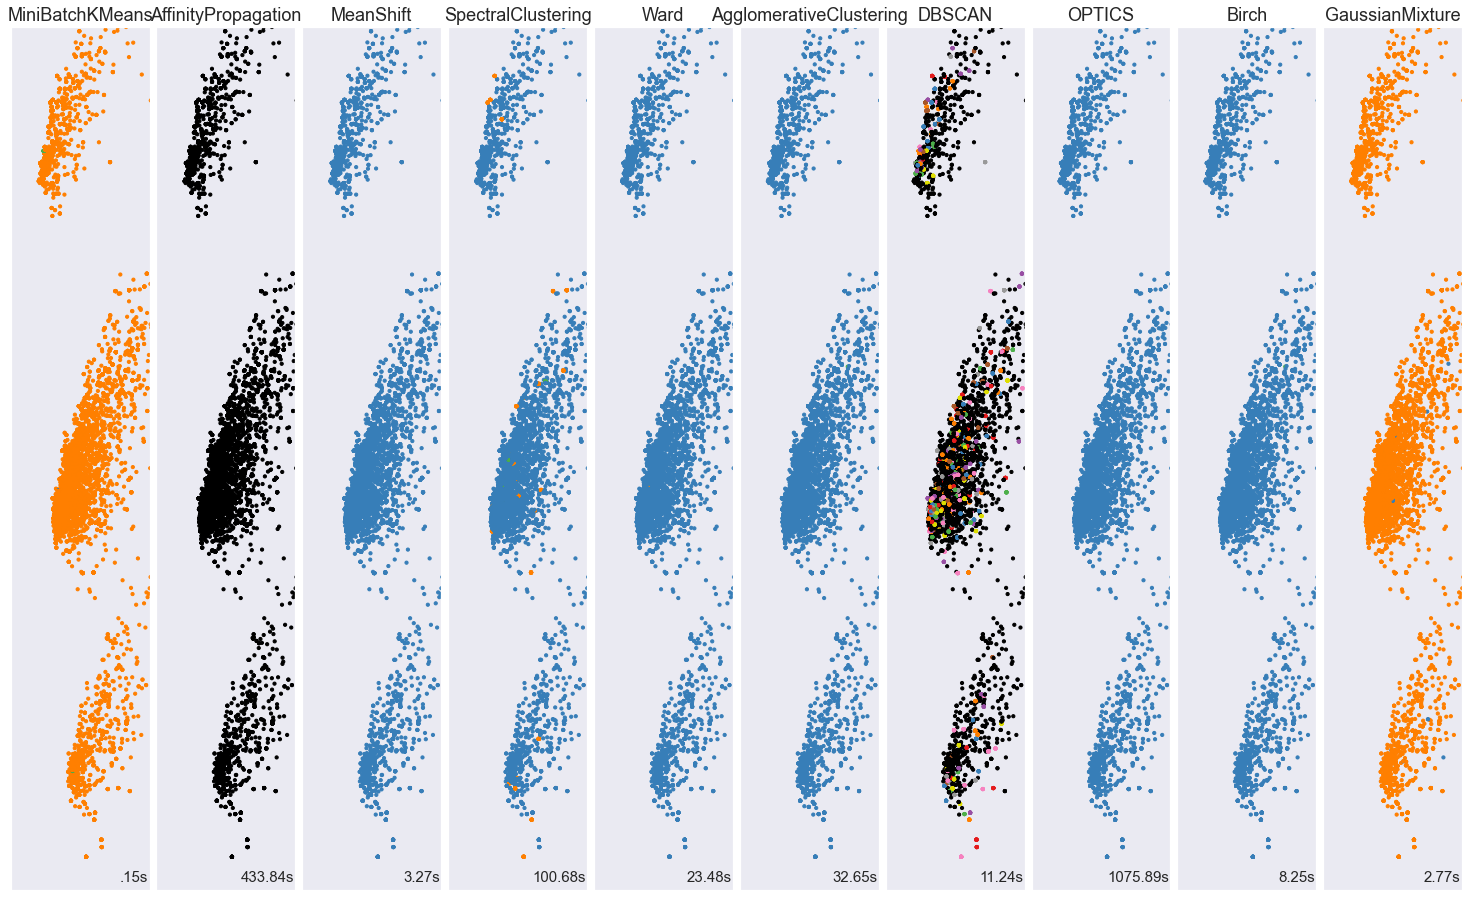

In [175]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [(X_PCAdata, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()